In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
set_matplotlib_formats("svg")
plt.style.use('ggplot')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lecture 14 – Distributions and Sampling

## DSC 10, Fall 2022

### Announcements

- Homework 4 is due **tomorrow at 11:59PM**.
- The Midterm Project is due **Tuesday 11/1 at 11:59PM**. Use [pair programming 👯](https://dsc10.com/pair-programming/). See [this post](https://edstem.org/us/courses/29053/discussion/1992062) for clarifications. 
- The Midterm Exam is on **Friday 10/28 during lecture**. See [this post](https://edstem.org/us/courses/29053/discussion/2013209) for lots of details, including how to find your assigned seat, what to bring, and how to study.
- 10+ more weekly office hours are new this week!
    - We take your responses to the [Mid-Quarter Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSd7soG9rXzWqaoieBm3-VtQxmMU9DRB3_7ihXP6tZlU58I0xQ/viewform) seriously.

### Agenda

- Probability distributions vs. empirical distributions.
- Populations and samples.
- Parameters and statistics.

⚠️ The second half of the course is more conceptual than the first. Reading the [textbook](https://inferentialthinking.com/chapters/intro.html) will become more critical.

## Probability distributions vs. empirical distributions

### Probability distributions
- Consider a random quantity with various possible values, each of which has some associated probability.

- A **probability distribution** is a description of:
    - All possible values of the quantity.
    - The theoretical probability of each value.

### Example: Probability distribution of a die roll 🎲

The distribution is **uniform**, meaning that each outcome has the same probability of occurring.

In [2]:
die_faces = np.arange(1, 7, 1)
die = bpd.DataFrame().assign(face=die_faces)
die

,face
0,1
1,2
2,3
3,4
4,5
5,6


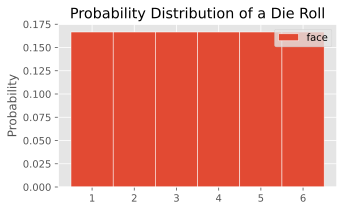

In [3]:
bins = np.arange(0.5, 6.6, 1)

# Note that you can add titles to your visualizations, like this!
die.plot(kind='hist', y='face', bins=bins, density=True, ec='w', 
         title='Probability Distribution of a Die Roll',
         figsize=(5, 3))

# You can also set the y-axis label with plt.ylabel
plt.ylabel('Probability');

### Empirical distributions

- Unlike probability distributions, which are theoretical, **empirical distributions are based on observations**.

- Commonly, these observations are of repetitions of an experiment.

- An **empirical distribution** describes:
    - All observed values.
    - The proportion of observations in which each value occurred.

- Unlike probability distributions, empirical distributions represent what actually happened in practice. 

### Example: Empirical distribution of a die roll 🎲
- Let's simulate a roll by using `np.random.choice`.
- Rolling a die = sampling with replacement.
    - If you roll a 4, you can roll a 4 again.

In [4]:
num_rolls = 25
many_rolls = np.random.choice(die_faces, num_rolls)
many_rolls

array([1, 4, 3, ..., 1, 6, 3])

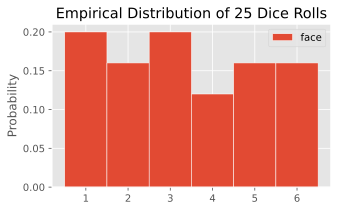

In [6]:
(bpd.DataFrame()
 .assign(face=many_rolls) 
 .plot(kind='hist', y='face', bins=bins, density=True, ec='w',
       title=f'Empirical Distribution of {num_rolls} Dice Rolls',
       figsize=(5, 3))
)
plt.ylabel('Probability');

### Many die rolls 🎲

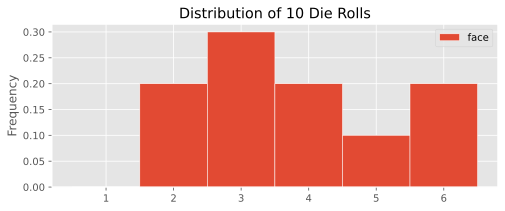

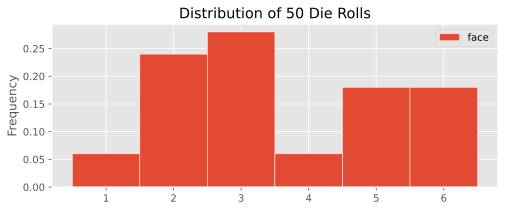

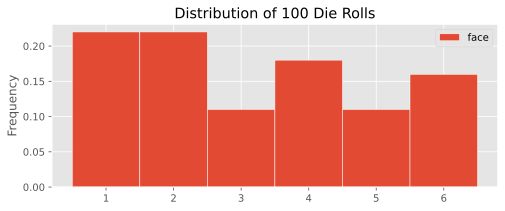

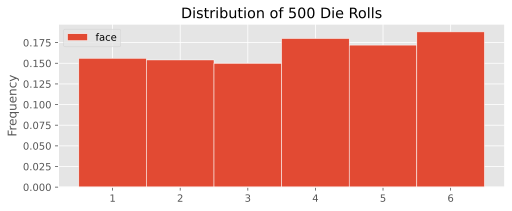

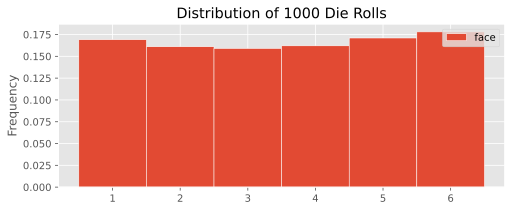

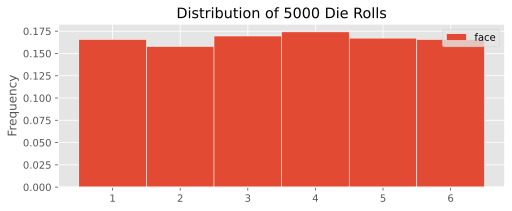

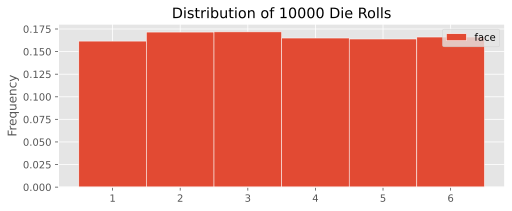

In [7]:
for num_rolls in [10, 50, 100, 500, 1000, 5000, 10000]:
    # Don't worry about how .sample works just yet – we'll cover it shortly
    (die.sample(n=num_rolls, replace=True)
     .plot(kind='hist', y='face', bins=bins, density=True, ec='w', 
           title=f'Distribution of {num_rolls} Die Rolls',
           figsize=(8, 3))
    )

### Why does this happen? ⚖️

The **law of large numbers** states that if a chance experiment is repeated 

- many times,

- independently, and

- under the same conditions,
    
then the **proportion** of times that an event occurs gets closer and closer to the **theoretical probability** of that event.

**For example:** As you roll a die repeatedly, the proportion of times you roll a 5 gets closer to $\frac{1}{6}$.

## Sampling

### Populations and samples

- A **population** is the complete group of people, objects, or events that we want to learn something about.

- It's often infeasible to collect information about every member of a population.

- Instead, we can collect a **sample**, which is a subset of the population.

- **Goal**: estimate the distribution of some numerical variable in the population, using only a sample.
    - For example, say we want to know the number of credits each UCSD student is taking this quarter.
    - It's too hard to get this information for every UCSD student – we can't find the **population distribution**.
    - Instead, we can collect data from a subset of UCSD students, to compute a **sample distribution**.

**Question:** How do we collect a good sample, so that the sample distribution closely approximates the population distribution?

**Bad idea ❌:** Survey whoever you can get ahold of (e.g. internet survey, people in line at Panda Express at PC).
   - Such a sample is known as a convenience sample.
   - Convenience samples often contain hidden sources of **bias**.

### Probability sample (aka random sample)

- In order for a sample to be a probability sample, you **must be able to calculate the probability of selecting any subset of the population**.

- Not all individuals need to have an equal chance of being selected.

### Example: Movies 🎥

In [8]:
top = bpd.read_csv('data/top_movies.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
...,...,...,...,...,...
197,Duel in the Sun,Selz.,20408163,443877500,1946
198,Sergeant York,Warner Bros.,16361885,418671800,1941
199,The Four Horsemen of the Apocalypse,MPC,9183673,399489800,1921


### A probability sample
- **Scheme:** Start with a random number between 0 and 9 take every tenth row thereafter.
    - **This is a probability sample!**
- Any given row is equally likely to be picked, with probability $\frac{1}{10}$.
- It is **not** true that every subset of rows has the same probability of being selected.
    - There are only 10 possible samples: rows (0, 10, 20, 30, ..., 190), rows (1, 11, 21, ..., 191), and so on.

In [9]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

,Title,Studio,Gross,Gross (Adjusted),Year
2,Titanic,Paramount,658672302,1178627900,1997
12,The Hunger Games: Catching Fire,Lionsgate,424668047,444697400,2013
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
...,...,...,...,...,...
172,My Fair Lady,Warner Bros.,72000000,522000000,1964
182,Goldfinger,UA,51081062,576810000,1964
192,The Bridge on the River Kwai,Columbia,27200000,473280000,1957


### Simple random sample

- A **simple random sample (SRS)** is a sample drawn **uniformly** at random **without** replacement.

- In an SRS...
    - Every individual has the same chance of being selected.
    - Every pair has the same chance of being selected.
    - Every triplet has the same chance of being selected.
    - And so on...

- To perform an SRS from a list or array `options`, we use `np.random.choice(options, replace=False)`.
    - If we use `replace=True`, then we're **sampling uniformly at random with replacement** – there's no simpler term for this.

### Sampling rows from a DataFrame

If we want to sample rows from a DataFrame, we can use the `.sample` method on a DataFrame. That is,

```py
df.sample(n)
```

returns a random subset of `n` rows of `df`, drawn **without replacement** (i.e. the default is `replace=False`, unlike `np.random.choice`).

In [10]:
# Without replacement
top.sample(5)

,Title,Studio,Gross,Gross (Adjusted),Year
124,The Firm,Paramount,158348367,332761100,1993
70,The Incredibles,Buena Vista (Disney),261441092,365660600,2004
16,Iron Man 3,Buena Vista (Disney),409013994,424632700,2013
187,Swiss Family Robinson,Disney,40356000,468129600,1960
182,Goldfinger,UA,51081062,576810000,1964


In [12]:
# With replacement
top.sample(5, replace=True)

,Title,Studio,Gross,Gross (Adjusted),Year
66,Meet the Fockers,Universal,279261160,384305300,2004
102,Toy Story,Buena Vista (Disney),191796233,381654400,1995
13,Pirates of the Caribbean: Dead Man's Chest,Buena Vista (Disney),423315812,562266800,2006
173,"What's Up, Doc?",Warner Bros.,66000000,337764700,1972
111,Top Gun,Paramount,179800601,417818200,1986


### The effect of sample size

- The law of large numbers states that when we repeat a chance experiment more and more times, the empirical distribution will look more and more like the true probability distribution.

- **Similarly, if we take a large simple random sample, then the sample distribution is likely to be a good approximation of the true population distribution.**

### Example: Distribution of flight delays ✈️

`united_full` contains information about all United flights leaving SFO between 6/1/15 and 8/31/15.

In [13]:
united_full = bpd.read_csv('data/united_summer2015.csv')
united_full

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
...,...,...,...,...
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1
13824,8/31/15,2013,EWR,-2


We only need the `'Delay'`s, so let's select just that column.

In [14]:
united = united_full.get(['Delay'])
united

,Delay
0,257
1,28
2,-3
...,...
13822,3
13823,-1
13824,-2


### Population distribution of flight delays ✈️

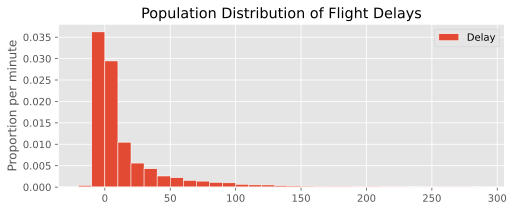

In [15]:
bins = np.arange(-20, 300, 10)
united.plot(kind='hist', y='Delay', bins=bins, density=True, ec='w', 
            title='Population Distribution of Flight Delays', figsize=(8, 3))
plt.ylabel('Proportion per minute');

Note that this distribution is **fixed** – nothing about it is random.

### Sample distribution of flight delays ✈️

- The 13825 flight delays in `united` constitute our population.
- Normally, we won't have access to the entire population.
- To replicate a real-world scenario, we will sample from `united` **without replacement**.

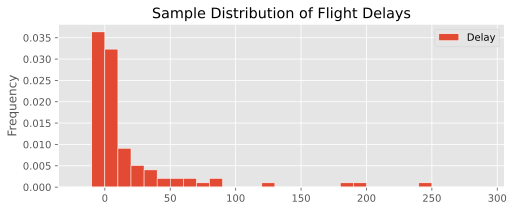

In [21]:
# Sample distribution
sample_size = 100
(united
 .sample(sample_size)
 .plot(kind='hist', y='Delay', bins=bins, density=True, ec='w',
       title='Sample Distribution of Flight Delays',
       figsize=(8, 3))
);

Note that as we increase `sample_size`, the sample distribution of delays looks more and more like the true population distribution of delays.

## Parameters and statistics

### Terminology

- **Statistical inference** is the practice of making conclusions about a population, using data from a random sample.

- **Parameter**: A number associated with the population.
    - Example: The population mean.

- **Statistic**: A number calculated from the sample.
    - Example: The sample mean.

- A statistic can be used as an **estimate** for a parameter.

_To remember: **p**arameter and **p**opulation both start with p, **s**tatistic and **s**ample both start with s._

### Mean flight delay ✈️

**Question:** What is the average delay of United flights out of SFO? 🤔

- We'd love to know the **mean delay in the population (parameter)**, but in practice we'll only have a **sample**.

- How does the **mean delay in the sample (statistic)** compare to the **mean delay in the population (parameter)**?

### Population mean

The **population mean** is a **parameter**.

In [22]:
# Calculate the mean of the population
united_mean = united.get('Delay').mean()
united_mean

16.658155515370705

This number (like the population distribution) is fixed, and is not random. In reality, we would not be able to see this number – we can only see it right now because this is a pedagogical demonstration!

### Sample mean

The **sample mean** is a **statistic**. Since it depends on our sample, which was drawn at random, the sample mean is **also random**.

In [25]:
# Size 100
united.sample(13000).get('Delay').mean()

16.677615384615386

- Each time we run the cell above, we are:
    - Collecting a new sample of size 100 from the population, and
    - Computing the sample mean.
- We see a slightly different value on each run of the cell.
    - Sometimes, the sample mean is close to the population mean.
    - Sometimes, it's far away from the population mean.

### The effect of sample size

What if we choose a larger sample size?

In [ ]:
# Size 1000
united.sample(1000).get('Delay').mean()

- Each time we run this cell, the result is still slightly different.
- However, the results seem to be much closer together – and much closer to the true population mean – than when we used a sample size of 100.
- **In general**, statistics computed on larger samples tend to be more accurate than statistics computed on smaller samples.

**Smaller samples**:<center><img src='data/bullseye-high.png' width=300></center>

**Larger samples**:<center><img src='data/bullseye-low.png' width=300></center>

### Probability distribution of a statistic

- The value of a statistic, e.g. the sample mean, is random, because it depends on a random sample.

- Like other random quantities, we can study the "probability distribution" of the statistic (also known as its "sampling distribution").
    - This describes all possible values of the statistic and all the corresponding probabilities.
    - Why? **We want to know how different our statistic _could have_ been, had we collected a different sample.**

- Unfortunately, this can be hard to calculate exactly.
    - Option 1: Do the math by hand.
    - Option 2: Generate **all** possible samples and calculate the statistic on each sample.

- So we'll use simulation again to approximate:
    - Generate **a lot of** possible samples and calculate the statistic on each sample.

### Empirical distribution of a statistic
- The empirical distribution of a statistic is based on simulated values of the statistic. It describes
    - all the observed values of the statistic, and
    - the proportion of times each value appeared.

- The empirical distribution of a statistic can be a good approximation to the probability distribution of the statistic, **if the number of repetitions in the simulation is large**.

### Distribution of sample means

- Let's...
    - Repeatedly draw a bunch of samples.
    - Record the mean of each.
    - Draw a histogram of the resulting distribution.
- Try different sample sizes and look at the resulting histogram!

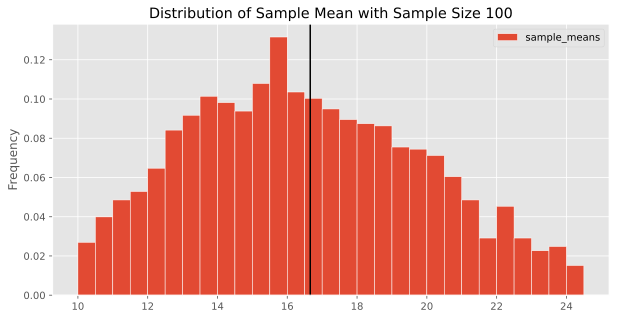

In [33]:
# Sample one thousand flights, two thousand times
sample_size = 100
repetitions = 2000
sample_means = np.array([])

for n in np.arange(repetitions):
    m = united.sample(sample_size).get('Delay').mean()
    sample_means = np.append(sample_means, m)

bpd.DataFrame().assign(sample_means=sample_means) \
               .plot(kind='hist', bins=np.arange(10, 25, 0.5), density=True, ec='w',
                     title=f'Distribution of Sample Mean with Sample Size {sample_size}',
                     figsize=(10, 5));
    
plt.axvline(x=united_mean, c='black');

### What's the point?

- In practice, we will only be able to collect one sample and calculate one statistic.
    - Sometimes, that sample will be very representative of the population, and the statistic will be very close to the parameter we are trying to estimate.
    - Other times, that sample will not be as representative of the population, and the statistic will not be very close to the parameter we are trying to estimate.

- The empirical distribution of the sample mean helps us answer the question "**what would the sample mean have looked like if we drew a different sample?**"

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

We just sampled **one thousand** flights, two thousand times. If we now sample **one hundred** flights, two thousand times, how will the histogram change?

- A.  narrower  
- B.  wider  
- C.  shifted left  
- D.  shifted right  
- E.  unchanged

### How we sample matters!

* So far, we've taken large simple random samples, **without replacement**, from the full population.
    * If the population is large enough, then it doesn't really matter if we sample with or without replacement.

* The sample mean, for samples like this, is a good approximation of the population mean.

* But this is not always the case if we sample differently.

## Summary, next time

### Summary

- The **probability distribution** of a random quantity describes the values it takes on along with the probability of each value occurring.
- An **empirical distribution** describes the values and frequencies of the results of a random experiment.
    - With more trials of an experiment, the empirical distribution gets closer to the probability distribution.
- A **population distribution** describes the values and frequencies of some characteristic of a population.
- A **sample distribution** describes the values and frequencies of some characteristic of a sample, which is a subset of a population.
    - When we take a simple random sample, as we increase our sample size, the sample distribution gets closer and closer to the population distribution.
- A **parameter** is a number associated with a **population**, and a **statistic** is a number associated with a **sample**.
- We can use statistics calculated on a random samples to **estimate** population parameters.
    - For example, to estimate the mean of a population, we can calculate the mean of the sample.
    - Larger samples tend to lead to better estimates.

### Next time

Next, we'll start talking about statistical models, which will lead us towards **hypothesis testing**.